In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import matplotlib.pyplot as plt

# You can download the CSV file from the below link

https://mavsuta-my.sharepoint.com/:x:/r/personal/ixm6153_mavs_uta_edu/Documents/AAPL.csv?d=w0cebc6360f424376b13fcd93b2e642c5&csf=1&web=1&e=lazktz


# Download the CSV file and place it in the same directory of the code and execute the code

In [2]:
fname=input("Enter the company name: ")

In [3]:
data_set=pd.read_csv(fname) # Converting the File into dataframe
print(data_set.head(5)) #printing the first 5 values of File
print(data_set.tail(5)) #printing the last 5 values of File

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099722  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094519  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087582  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089749   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092351   73449600
             Date        Open        High         Low       Close   Adj Close  \
10668  2023-04-06  162.429993  164.960007  162.000000  164.660004  164.660004   
10669  2023-04-10  161.419998  162.029999  160.080002  162.029999  162.029999   
10670  2023-04-11  162.350006  162.360001  160.509995  160.800003  160.800003   
10671  2023-04-12  161.220001  162.059998  159.779999  160.100006  160.100006   
10672  2023-04-13  161.630005  165.800003  161.419998  165.559998  165.559998   

         Volume  
10668  45390100  
10669  47716900  
106

In [4]:
data_set_close=data_set.reset_index()['Close'] # Here we are selecting only Closing values
data_set_close #printing the closed value dataframe

0          0.128348
1          0.121652
2          0.112723
3          0.115513
4          0.118862
            ...    
10668    164.660004
10669    162.029999
10670    160.800003
10671    160.100006
10672    165.559998
Name: Close, Length: 10673, dtype: float64

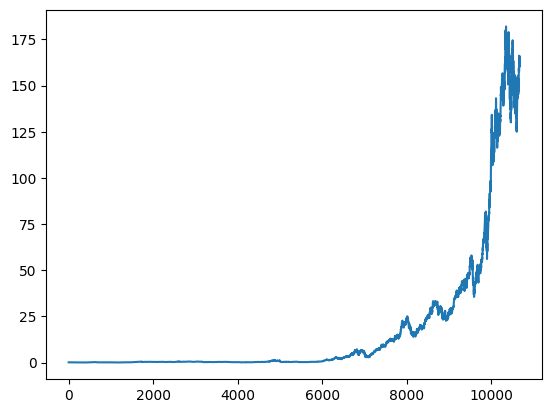

In [5]:
plt.plot(data_set_close) #plotting the close dataset value

In [6]:
#Using the Min Max Scaler with range of 0 to 1 in preprocessing
scaler=MinMaxScaler(feature_range=(0,1))
##Fitting the minmaxscaler to the close value dataset and reshaping
data_set_close=scaler.fit_transform(np.array(data_set_close).reshape(-1,1))

In [7]:
print(data_set_close)

[[4.35483696e-04]
 [3.98684579e-04]
 [3.49613594e-04]
 ...
 [8.83436533e-01]
 [8.79589569e-01]
 [9.09595973e-01]]


In [8]:
# Splitting Close value dataset into train and test
training_set_size=int(len(data_set_close)*0.65) # Converting the dataset values into training and testing as 65:35
test_set_size=len(data_set_close)-training_set_size # 35% as testing
train_ValSet, test_ValSet= np.array(data_set_close[0:training_set_size, :]), np.array(data_set_close[training_set_size:len(data_set_close), :1]) #Inserting the values into Training and Testing Datasets

In [9]:
training_set_size,test_set_size # Trainig and Testing size

(6937, 3736)

In [10]:
print(train_ValSet)

[[0.00043548]
 [0.00039868]
 [0.00034961]
 ...
 [0.03616652]
 [0.03537554]
 [0.03616652]]


In [11]:
# convert the dataset values into a dataset matrix
def create_dataset(current_dataset, time_step_val=1):
    X_value, Y_value = [], [] # Lists to store input and output values

     # Iterate over the dataset
    for i in range(len(current_dataset) - time_step_val - 1):
        a = current_dataset[i:(i + time_step_val), 0]  # Extract input sequence from dataset
        X_value.append(a) # Append input sequence to X_value list
        Y_value.append(current_dataset[i + time_step_val, 0]) # Append next value as output to Y_value list

    return np.array(X_value), np.array(Y_value) # Return input and output values as numpy arrays


In [12]:

time_step = 100  # Set the time step value for creating the dataset

# Create training dataset
X_train, y_train = create_dataset(train_ValSet, time_step)
# Here, train_ValSet is the input dataset for training
# The function create_dataset is called to create input sequences (X_train) and corresponding output values (y_train)

# Create testing dataset
X_test, y_test = create_dataset(test_ValSet, time_step)
# Here, test_ValSet is the input dataset for testing
# The function create_dataset is called to create input sequences (X_test) and corresponding output values (y_test)


#----------------
# Print the training data
print(X_train)
# Display the training data, which represents the input sequences for training

[[0.00043548 0.00039868 0.00034961 ... 0.00042322 0.00042015 0.00040175]
 [0.00039868 0.00034961 0.00036495 ... 0.00042015 0.00040175 0.00041095]
 [0.00034961 0.00036495 0.00038335 ... 0.00040175 0.00041095 0.00041708]
 ...
 [0.03362477 0.03482008 0.03290837 ... 0.03625681 0.03611353 0.0360782 ]
 [0.03482008 0.03290837 0.03106339 ... 0.03611353 0.0360782  0.0369104 ]
 [0.03290837 0.03106339 0.03130873 ... 0.0360782  0.0369104  0.03616652]]


In [13]:


# Print the shapes of training data and corresponding output
print(X_train.shape), print(y_train.shape)
# Display the shape of X_train, which represents the dimensions of the input sequences for training
# Display the shape of y_train, which represents the dimensions of the corresponding output values for training

# Print the shapes of testing data and corresponding output
print(X_test.shape), print(y_test.shape)
# Display the shape of X_test, which represents the dimensions of the input sequences for testing
# Display the shape of y_test, which represents the dimensions of the corresponding output values for testing


(6836, 100)
(6836,)
(3635, 100)
(3635,)


(None, None)

In [14]:
# Reshape the training data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# Here, X_train is reshaped to have dimensions [number of samples, time steps, features]
# The third dimension (1) indicates that there is only one feature in the input data

# Reshape the testing data
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# Here, X_test is reshaped to have dimensions [number of samples, time steps, features]
# The third dimension (1) indicates that there is only one feature in the input data


In [15]:
# Stacked LSTM model

# Create a sequential model
model = Sequential()

# Add LSTM layers to the model
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
# Add the first LSTM layer with 50 units, returning sequences, and specifying the input shape
# The input shape is (100, 1), representing 100 time steps and 1 feature

model.add(LSTM(50, return_sequences=True))
# Add the second LSTM layer with 50 units, returning sequences
# This layer does not require specifying the input shape since it automatically takes the output shape from the previous layer

model.add(LSTM(50))
# Add the third LSTM layer with 50 units
# This layer does not return sequences, as it is the final LSTM layer in the model

# Add a Dense layer for the output
model.add(Dense(1))
# Add a Dense layer with 1 unit, which will be the output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')
# Compile the model with mean squared error as the loss function and Adam optimizer


In [16]:
# Print the summary of the model
model.summary()
# Display a summary of the model architecture, including the layers, number of parameters, and output shapes


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1)
# Train the model using the training data (X_train, y_train)
# Use the testing data (X_test, y_test) for validation during training
# Perform 10 epochs (complete passes through the training data)
# Use a batch size of 64 samples per batch
# Set verbose=1 to display progress updates during training


Epoch 1/10
107/107 [==============================] - 24s 166ms/step - loss: 1.8995e-05 - val_loss: 0.0144
Epoch 2/10
107/107 [==============================] - 19s 182ms/step - loss: 5.5907e-07 - val_loss: 0.0097
Epoch 3/10
107/107 [==============================] - 16s 146ms/step - loss: 6.4598e-07 - val_loss: 0.0087
Epoch 4/10
107/107 [==============================] - 15s 140ms/step - loss: 6.7790e-07 - val_loss: 0.0079
Epoch 5/10
107/107 [==============================] - 15s 141ms/step - loss: 5.9110e-07 - val_loss: 0.0069
Epoch 6/10
107/107 [==============================] - 15s 140ms/step - loss: 6.6529e-07 - val_loss: 0.0057
Epoch 7/10
107/107 [==============================] - 16s 146ms/step - loss: 4.9314e-07 - val_loss: 0.0054
Epoch 8/10
107/107 [==============================] - 19s 175ms/step - loss: 4.2767e-07 - val_loss: 0.0039
Epoch 9/10
107/107 [==============================] - 22s 210ms/step - loss: 5.4718e-07 - val_loss: 0.0052
Epoch 10/10
107/107 [================

In [18]:
# Generate predictions on the training data
train_predict = model.predict(X_train)
# Use the trained model (model) to make predictions on the input training data (X_train)
# The predictions for the training data are stored in the train_predict variable

# Generate predictions on the testing data
test_predict = model.predict(X_test)
# Use the trained model (model) to make predictions on the input testing data (X_test)
# The predictions for the testing data are stored in the test_predict variable


114/114 [==============================] - 4s 35ms/step


In [19]:
# Inverse transform the predicted values to their original scale
train_predict = scaler.inverse_transform(train_predict)
# Use the scaler's inverse_transform method to convert the scaled training predictions back to the original scale

test_predict = scaler.inverse_transform(test_predict)
# Use the scaler's inverse_transform method to convert the scaled testing predictions back to the original scale


In [20]:
import math
from sklearn.metrics import mean_squared_error

# Calculate and print the root mean squared error (RMSE) of the training data
print("RMSE of training data:", math.sqrt(mean_squared_error(y_train, train_predict)))
# The mean_squared_error function from sklearn.metrics calculates the mean squared error between the true output (y_train) and the predicted output (train_predict)
# The math.sqrt function is used to take the square root of the mean squared error, resulting in the root mean squared error (RMSE)
# The RMSE of the training data is printed to the console

# Calculate and print the root mean squared error (RMSE) of the testing data
print("RMSE of testing data:", math.sqrt(mean_squared_error(y_test, test_predict)))
# The mean_squared_error function from sklearn.metrics calculates the mean squared error between the true output (y_test) and the predicted output (test_predict)
# The math.sqrt function is used to take the square root of the mean squared error, resulting in the root mean squared error (RMSE)
# The RMSE of the testing data is printed to the console


RMSE of training data: 1.2252882279936783
RMSE of testing data: 54.41564536087678


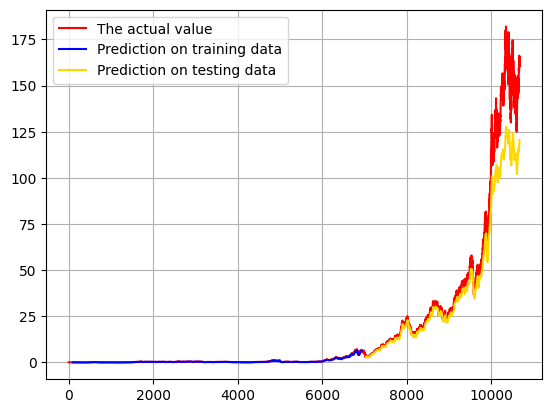

In [21]:
# Plotting
Previous_Time_Stamp = 100  # Number of previous time steps to consider

# Create empty arrays for train_data and test_data with the same shape as data_set_close
plot_train_data = np.empty_like(data_set_close)
plot_test_data = np.empty_like(data_set_close)

# Fill train_data array with NaN values
plot_train_data[:, :] = np.nan
# Set the values of train_data from look_back to len(train_predict)+look_back as the predicted values from training
plot_train_data[Previous_Time_Stamp:len(train_predict) + Previous_Time_Stamp, :] = train_predict

# Fill test_data array with NaN values
plot_test_data[:, :] = np.nan
# Set the values of test_data from len(train_predict)+(look_back*2)+1 to len(data_set_close)-1
# as the predicted values from testing
plot_test_data[len(train_predict) + (Previous_Time_Stamp * 2) + 1:len(data_set_close) - 1, :] = test_predict

# Plot the actual values, predicted values on training data, and predicted values on testing data
plt.plot(scaler.inverse_transform(data_set_close), label="The actual value", color="red")
# Plot the actual values (data_set_close) after inverting the scaling transformation

plt.plot(plot_train_data, label="Prediction on training data", color="blue")
# Plot the predicted values on training data (train_data)

plt.plot(plot_test_data, label="Prediction on testing data", color="gold")
# Plot the predicted values on testing data (test_data)

plt.legend()  # Display the legend
plt.grid()  # Add grid lines to the plot
plt.show()  # Show the plot


In [22]:
# Print the length of the test_ValSet
print(len(test_ValSet))
# Display the length (number of elements) in the test_ValSet dataset

# Reshape the portion of test_ValSet for prediction
plot_x_input = test_ValSet[3636:].reshape(1, -1)
# Extract a portion of test_ValSet starting from index 117 until the end
# Reshape the extracted portion to have dimensions (1, -1), where the first dimension represents a single sample
# The -1 in the reshape operation is used to infer the size of the second dimension based on the length of the extracted portion

plot_x_input.shape
# Display the shape of the reshaped input data (x_input)


3736


(1, 100)

In [23]:
# Convert x_input to a list
temp_array = list(plot_x_input)
# Convert the array x_input to a Python list

# Convert the first element of temp_array to a list
temp_array = temp_array[0].tolist()
# Select the first element of temp_array (which is a list) and convert it to a Python list

temp_array
# Display the value of temp_array


[0.8280400016513438,
 0.8311724990042915,
 0.8131466581983267,
 0.8250722869631192,
 0.8299635249087155,
 0.8136962598248036,
 0.7923180392480828,
 0.7755561788641083,
 0.8132565939115443,
 0.8147953806424598,
 0.8120475373806705,
 0.8055626657526533,
 0.7851187063892542,
 0.7742921929464314,
 0.7836897729362585,
 0.7809969414965703,
 0.793801896592195,
 0.799187647402556,
 0.7867674288333874,
 0.7498913337903692,
 0.7389548901300151,
 0.7271941209695568,
 0.7268094668783985,
 0.744120846453552,
 0.7264247303519423,
 0.724391353816651,
 0.714334236487129,
 0.6924064582494233,
 0.7120260591385991,
 0.7137846348606519,
 0.6870756368258655,
 0.6941650779369685,
 0.686800836012627,
 0.7120809830297156,
 0.7149936913915257,
 0.7181812005665744,
 0.7333493448328301,
 0.7329096844152573,
 0.7403288117609098,
 0.7468137603285382,
 0.7428019366447584,
 0.7431316613491136,
 0.7574203968492392,
 0.7752264541597532,
 0.7830303180318618,
 0.7793482190524372,
 0.7908891937260714,
 0.80171561923791,


In [24]:
lst_output = []  # List to store the predicted outputs
n_steps = 100  # Number of time steps for input sequence
i = 0  # Loop counter for generating predictions
while(i<30):

    if(len(temp_array)>100):
        # Extract the elements from temp_array starting from index 1 and convert it to a numpy array
        plot_x_input=np.array(temp_array[1:])
        # Print the input sequence for the current day (i)
        print("{} day input {}".format(i, plot_x_input))
        # Reshape the input sequence to have dimensions (1, -1)
        plot_x_input=plot_x_input.reshape(1, -1)
        # Reshape the input sequence to have dimensions (1, n_steps, 1) to match the model's input shape
        plot_x_input = plot_x_input.reshape((1, n_steps, 1))

        # Generate the predicted output (yhat) for the input sequence using the trained model
        yhat = model.predict(plot_x_input, verbose=0) # the predicted value (Yhat) is called the residual (e)

        # Print the predicted output for the current day (i)
        print("{} day output {}".format(i,yhat))
        # Extend temp_array with the predicted output by converting it to a list and adding it to the end
        temp_array.extend(yhat[0].tolist())
        # Remove the first element from temp_array
        temp_array= temp_array[1:]

        # Extend lst_output with the predicted output (yhat) by converting it to a list
        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        # Reshape the input sequence to have dimensions (1, n_steps, 1) to match the model's input shape
        plot_x_input = plot_x_input.reshape((1, n_steps, 1))
        # Generate the predicted output (yhat) for the input sequence using the trained model
        yhat = model.predict(plot_x_input, verbose=0)
        # Print the predicted output for the current day (i)
        print(yhat[0])
        # Extend temp_array with the predicted output by converting it to a list and adding it to the end
        temp_array.extend(yhat[0].tolist())

        print(len(temp_array))

        # Extend lst_output with the predicted output (yhat) by converting it to a list
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.66310394]
101
1 day input [0.8311725  0.81314666 0.82507229 0.82996352 0.81369626 0.79231804
 0.77555618 0.81325659 0.81479538 0.81204754 0.80556267 0.78511871
 0.77429219 0.78368977 0.78099694 0.7938019  0.79918765 0.78676743
 0.74989133 0.73895489 0.72719412 0.72680947 0.74412085 0.72642473
 0.72439135 0.71433424 0.69240646 0.71202606 0.71378463 0.68707564
 0.69416508 0.68680084 0.71208098 0.71499369 0.7181812  0.73334934
 0.73290968 0.74032881 0.74681376 0.74280194 0.74313166 0.7574204
 0.77522645 0.78303032 0.77934822 0.79088919 0.80171562 0.7856133
 0.79270269 0.79896778 0.8285896  0.84881369 0.83359062 0.84963801
 0.83463481 0.82886432 0.82963372 0.84524153 0.84166928 0.85337512
 0.84447214 0.83809712 0.81572964 0.81809283 0.82078566 0.80600233
 0.81265206 0.8098493  0.79830832 0.80160577 0.82974365 0.84513159
 0.83287623 0.83985569 0.82732553 0.81583957 0.82666608 0.83831691
 0.84051523 0.8562329  0.85156153 0.86475115 0.87508307 0.86711434
 0.87315954 0.88041389 0.86958738 0

In [25]:
new_day_val = np.arange(1, 101)
# Generate an array of integers from 1 to 100 (inclusive) and assign it to the variable

pred_day_val = np.arange(101, 131)
# Generate an array of integers from 101 to 130 (inclusive) and assign it to the variable

len(data_set_close)
# Calculate and display the length of the data_set_close array
# The len() function returns the number of elements in the array


10673

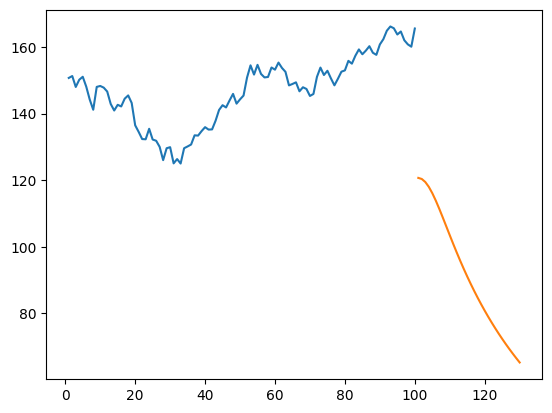

In [26]:
plt.plot(new_day_val, scaler.inverse_transform(data_set_close[10573:]))
plt.plot(pred_day_val, scaler.inverse_transform(lst_output))

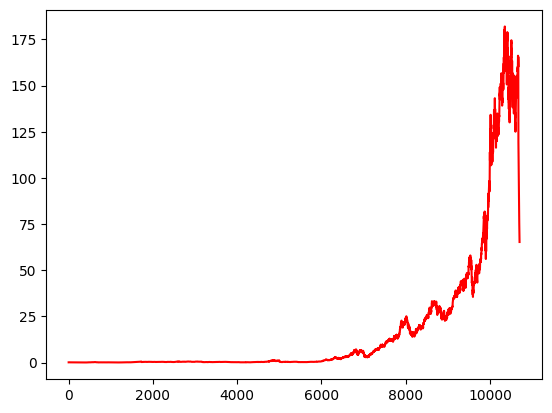

In [27]:
plotting_data = data_set_close.tolist()
# Convert the data_set_close array to a Python list and assign it to the variable data

plotting_data.extend(lst_output)
# Extend the data list with the predicted outputs (lst_output)

plotting_data = scaler.inverse_transform(plotting_data).tolist()
# Invert the scaling transformation applied to the data by using the scaler's inverse_transform method
# Convert the resulting array back to a Python list and assign it to the variable data

plt.plot(plotting_data, color="red")
# Plot the data using Matplotlib, where the data points are represented by the list values
# Set the color of the plot to red
